# Data analysis. 
In this notebook I will collect information about the seasons 14-15 to 19-20 combined.  
I will answer those questions : 
* Which 5 teams won the most games overall ? 
* Which 5 teams lost the most games overall ? 
* Which 5 teams won the most games away 
* which 5 teams won the most games at home ? 
* Which 5 teams lost the most games away ? 
* Which 5 teams lost the most games at home ?
* Overall percentage of home wins ? 
* Overall percentage of away wins ? 
* Overall percentage of home losses ? 
* Overall percentage of away losses ? 
* Correlation between playing at home and winning the game ? 
* Correlation between playing away and winning the game ? 




## Import datasets and libraries

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns

In [14]:
df = pd.read_csv("../assets/data/clean_data.csv")
df.drop("Unnamed: 0", inplace=True, axis=1)

## Which 5 teams won or lost the most games ? Away ? Home ? 

#### Feature engineering
Creation of new columns to easily count the losses and wins of each teams.

##### Creation of a full time winner column

In [44]:
def get_winner(ftr):
    if ftr.item() == "H":
        return df["HomeTeam"].iloc[ftr.name]
    elif ftr.item() == "A":
        return df["AwayTeam"].iloc[ftr.name]
    else :
        return "Draw"
df["ftr_winner"] = df[["FTR"]].apply(get_winner, axis=1)

##### Creation of a full time looser column

In [48]:
def get_looser(ftr):
    if ftr.item() == "H":
        return df["AwayTeam"].iloc[ftr.name]
    elif ftr.item() == "A":
        return df["HomeTeam"].iloc[ftr.name]
    else :
        return "Draw"
df["ftr_looser"] = df[["FTR"]].apply(get_looser, axis=1)

#### Value count 

##### Most wins overall

In [56]:
most_wins = df["ftr_winner"].value_counts(sort=True)
most_wins.head(6)

Draw         547
Man City     156
Liverpool    139
Chelsea      130
Tottenham    126
Arsenal      119
Name: ftr_winner, dtype: int64

##### Most losses overall 

In [58]:
most_losses = df["ftr_looser"].value_counts(sort=True)
most_losses.head(6)

Draw              547
Crystal Palace    105
Watford            92
West Ham           91
Bournemouth        91
Southampton        90
Name: ftr_looser, dtype: int64

##### Most home wins 

In [62]:
home_wins = df.loc[df["FTR"]== "H"]
most_home_wins = home_wins["ftr_winner"].value_counts(sort=True)
most_home_wins.head(5)

Man City     86
Arsenal      77
Liverpool    77
Tottenham    74
Chelsea      71
Name: ftr_winner, dtype: int64

##### Most away wins

In [70]:
away_wins = df.loc[df["FTR"]== "A"]
most_away_wins = away_wins["AwayTeam"].value_counts(sort=True)
most_away_wins.head(5)

Man City      70
Liverpool     62
Chelsea       59
Tottenham     52
Man United    50
Name: AwayTeam, dtype: int64

##### Most home losses

In [73]:
home_losses = df.loc[df["FTR"] == "A"]
most_home_losses = home_losses["HomeTeam"].value_counts(sort=True)
most_home_losses.head(5)

Crystal Palace    55
Southampton       40
West Ham          38
Burnley           38
Bournemouth       36
Name: HomeTeam, dtype: int64

##### Most away losses 

In [75]:
away_losses = df.loc[df["FTR"] == "H"]
most_away_losses = away_losses["AwayTeam"].value_counts(sort=True)
most_away_losses.head(5)

Watford        57
Newcastle      55
Bournemouth    55
Everton        54
West Ham       53
Name: AwayTeam, dtype: int64

## Overall percentage home wins, away wins, home losses, away losses

##### Percentage of home wins and away wins

In [83]:
percentages = df["FTR"].value_counts(normalize=True) *100
percentages = percentages.to_frame()
percentages

,FTR
H,45.701754
A,30.350877
D,23.947368


Home wins percentage  : 45.70 %.   

Away win percentage : 30.35 %.   

The percentages for the home losses and away losses are the same but inverted obviously.  

Away losses percentage : 45.70%.  

Home losses  percentage : 30.35%

In [101]:
corr = df.corr()

In [105]:
corr["Numerical_ftr"]

FTHG            -0.169953
FTAG             0.462536
HTHG            -0.121913
HTAG             0.329199
HS              -0.139759
AS               0.164895
HST             -0.156124
AST              0.284575
HF              -0.034590
AF              -0.045919
HC              -0.072951
AC               0.028006
HY              -0.014085
AY              -0.051877
HR               0.088846
AR              -0.059981
B365H            0.263349
B365D            0.017792
B365A           -0.124226
BWH              0.265098
BWD              0.019311
BWA             -0.125649
IWH              0.266142
IWD              0.019721
IWA             -0.125994
LBH              0.249067
LBD              0.004458
LBA             -0.122288
PSH              0.265794
PSD              0.017768
PSA             -0.123967
WHH              0.262218
WHD              0.021751
WHA             -0.119104
VCH              0.262262
VCD              0.019357
VCA             -0.117187
Bb1X2           -0.026621
BbMxH       

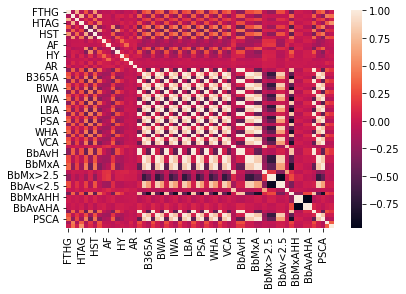

In [106]:
heatmap = sns.heatmap(corr)